# Install Library

In [ ]:
!pip install tensorflow==2.11.0

In [ ]:
!pip install keras

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to c:\users\administrator\appdata\local\temp\pip-req-build-nz7o0mxf
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101648 sha256=44a0bce0cf89e6d85886837ae75e30f2bbf6ce6ea52f9d9d64e4d8f6d04448fb
  Stored in directory: C:\Users\Administrator\AppData\Local\Temp\pip-ephem-wheel-cache-8j7rj4qk\wheels\83\b3\99\125cd08d3e8224b434b1b4badd6f8b2651e0251b7e8f983e60
Successfully built keras-contrib


  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git 'C:\Users\Administrator\AppData\Local\Temp\pip-req-build-nz7o0mxf'


In [ ]:
!pip install seqeval

In [ ]:
import pandas as pd
import numpy as np

# Data pre-processing

In [ ]:
df = pd.read_csv('data/train.csv', sep = '\t',header=None, names=["Word", "Pos", "Chunk", "Tag"])

In [ ]:
print(df.head(20))

     Word Pos Chunk Tag
0     Mâu   _     _   O
1   thuẫn   _     _   O
2    tình   _     _   O
3     cảm   _     _   O
4       ,   _     _   O
5   thanh   _     _   O
6    niên   _     _   O
7     tạt   _     _   O
8    xăng   _     _   O
9     đốt   _     _   O
10    cửa   _     _   O
11   hàng   _     _   O
12    bạn   _     _   O
13    gái   _     _   O
14    Xảy   _     _   O
15     ra   _     _   O
16    cãi   _     _   O
17     vã   _     _   O
18      ,   _     _   O
19  trong   _     _   O


In [ ]:
df['Word'] = df['Word'].astype(str)
df

,Word,Pos,Chunk,Tag
0,Mâu,_,_,O
1,thuẫn,_,_,O
2,tình,_,_,O
3,cảm,_,_,O
4,",",_,_,O
...,...,...,...,...
479248,Cao,_,_,B-PERSON
479249,Lực,_,_,I-PERSON
479250,(,_,_,O
479251,Theo,_,_,O


In [ ]:
sentence_list = []
index = 2
sentence_list.insert(0, "Sentence 1")
for i in range(1, len(df['Word'])+1):
    if df['Word'][i-1] == ".":
        sentence_list.append("Sentence " + str(index))
        index = index + 1
    else:
        sentence_list.append(" ")

sentence_list[0] = "Sentence 1"

#print(sentence_list)

In [ ]:
df['Sentence'] = pd.Series(sentence_list)
df

,Word,Pos,Chunk,Tag,Sentence
0,Mâu,_,_,O,Sentence 1
1,thuẫn,_,_,O,
2,tình,_,_,O,
3,cảm,_,_,O,
4,",",_,_,O,
...,...,...,...,...,...
479248,Cao,_,_,B-PERSON,Sentence 13014
479249,Lực,_,_,I-PERSON,
479250,(,_,_,O,
479251,Theo,_,_,O,


In [ ]:
df['Sentence'] = df['Sentence'].replace(' ', np.nan).ffill()

In [ ]:
print(df.head(50))

         Word Pos Chunk             Tag    Sentence
0         Mâu   _     _               O  Sentence 1
1       thuẫn   _     _               O  Sentence 1
2        tình   _     _               O  Sentence 1
3         cảm   _     _               O  Sentence 1
4           ,   _     _               O  Sentence 1
5       thanh   _     _               O  Sentence 1
6        niên   _     _               O  Sentence 1
7         tạt   _     _               O  Sentence 1
8        xăng   _     _               O  Sentence 1
9         đốt   _     _               O  Sentence 1
10        cửa   _     _               O  Sentence 1
11       hàng   _     _               O  Sentence 1
12        bạn   _     _               O  Sentence 1
13        gái   _     _               O  Sentence 1
14        Xảy   _     _               O  Sentence 1
15         ra   _     _               O  Sentence 1
16        cãi   _     _               O  Sentence 1
17         vã   _     _               O  Sentence 1
18          

In [ ]:
df1 = df[['Sentence', 'Word', 'Tag']]
df1

,Sentence,Word,Tag
0,Sentence 1,Mâu,O
1,Sentence 1,thuẫn,O
2,Sentence 1,tình,O
3,Sentence 1,cảm,O
4,Sentence 1,",",O
...,...,...,...
479248,Sentence 13014,Cao,B-PERSON
479249,Sentence 13014,Lực,I-PERSON
479250,Sentence 13014,(,O
479251,Sentence 13014,Theo,O


# Visualize Data

In [ ]:
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras_preprocessing.sequence import pad_sequences
import scipy.stats

In [ ]:
list_tags = list(set(df1["Tag"].values))
len_tags = len(list_tags)
print("List of tags: " + ', '.join([tag for tag in list_tags]))
print(f"Total Number of tags {len_tags}")

List of tags: B-LOCATION-STRUC, I-DATETIME-SET, O, B-ORGANIZATION-SPORTS, I-DATETIME-DATE, B-LOCATION-GEO, B-LOCATION, B-DATETIME-TIME, B-ORGANIZATION-STOCK, I-PERSON, I-ORGANIZATION-SPORTS, B-ORGANIZATION-MED, I-DATETIME-DURATION, I-ORGANIZATION-MED, B-ORGANIZATION, B-DATETIME-TIMERANGE, I-LOCATION-STRUC, I-DATETIME-TIMERANGE, I-LOCATION, B-DATETIME-DURATION, I-DATETIME-TIME, I-ORGANIZATION-STOCK, I-DATETIME, I-LOCATION-GEO, B-DATETIME-SET, B-DATETIME-DATERANGE, B-DATETIME, B-LOCATION-GPE, I-DATETIME-DATERANGE, I-ORGANIZATION, I-LOCATION-GPE, B-DATETIME-DATE, B-PERSON
Total Number of tags 33


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


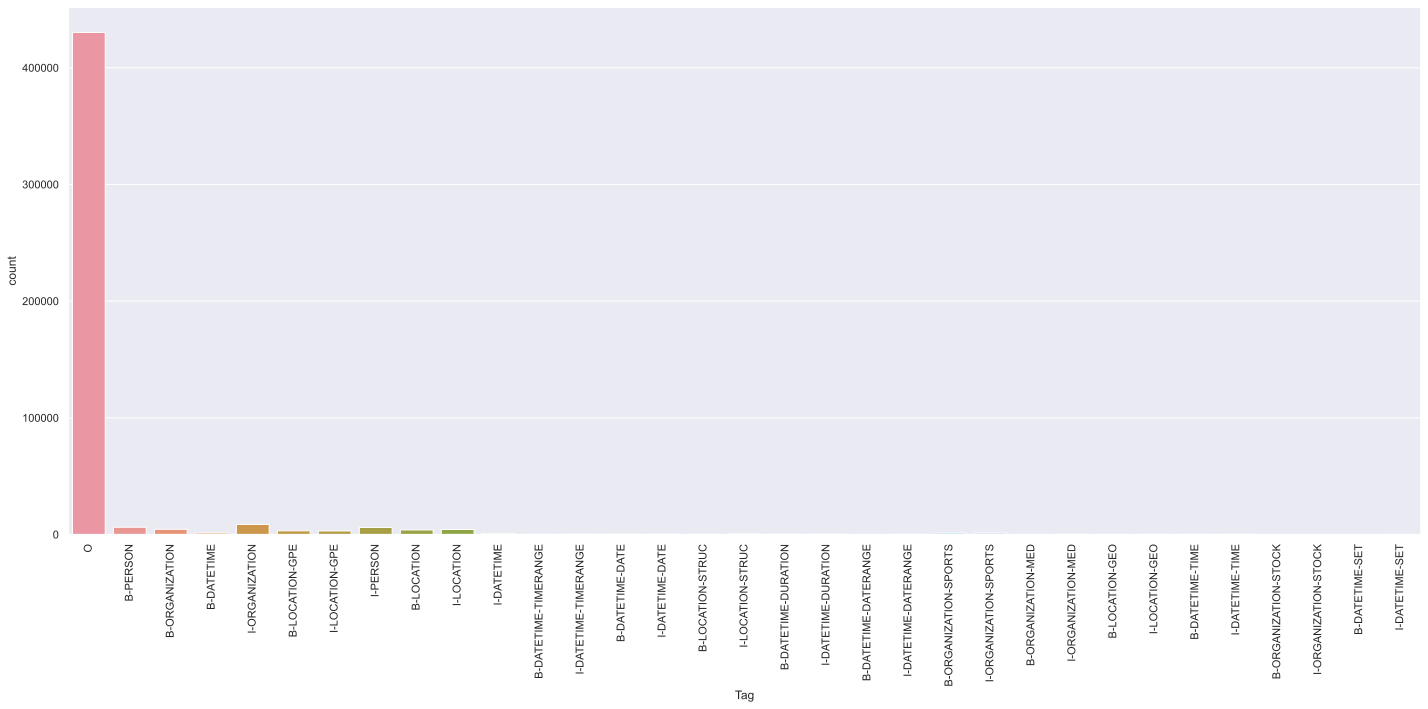

In [ ]:
#Words distribution across Tags
plt.figure(figsize=(20, 10))
ax = sns.countplot('Tag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


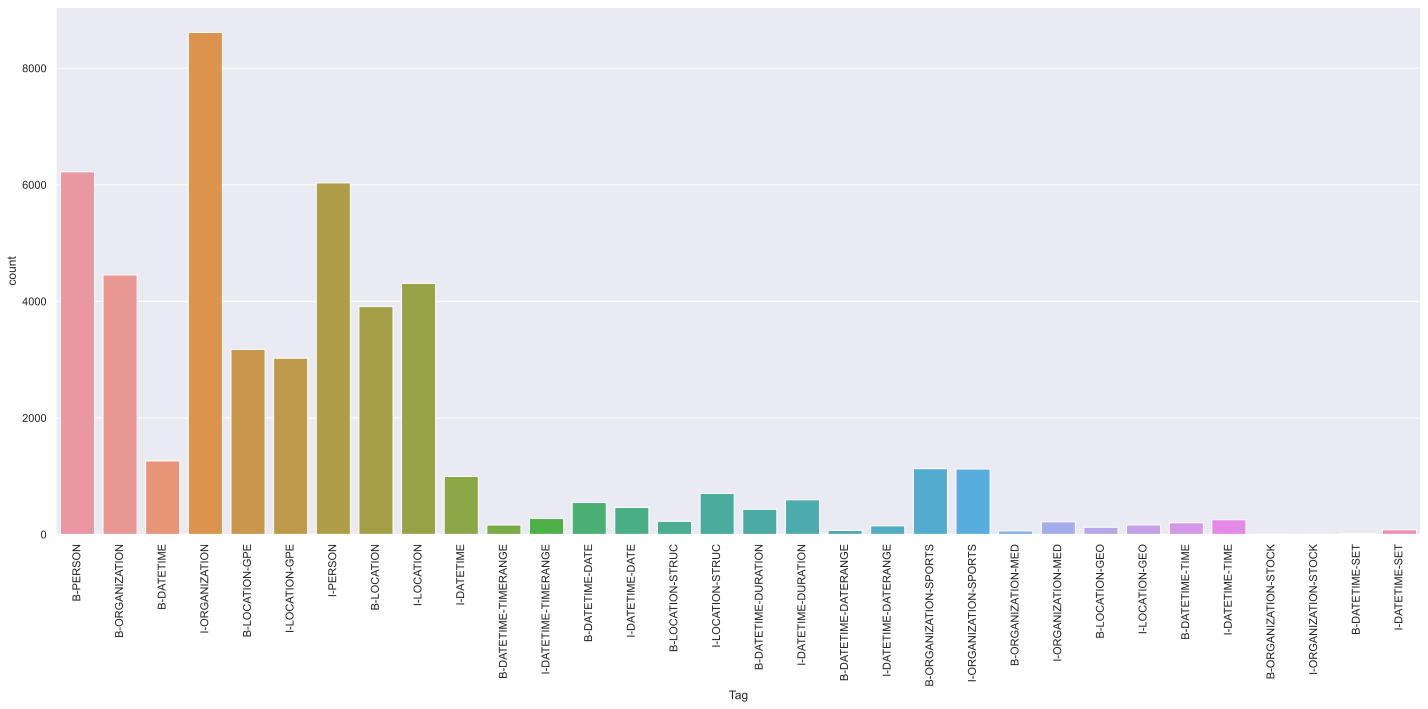

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.countplot('Tag', data=df1.loc[df1['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# Encoding Data

In [ ]:
class getsentence(object):
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                     s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
getter = getsentence(df1)

In [ ]:
sentences = getter.sentences
#ths is how a sentence will look like.
print(sentences[10])

[('Nhiều', 'O'), ('người', 'O'), ('đồn', 'O'), ('đoán', 'O'), (',', 'O'), ('bầu', 'O'), ('Đức', 'B-PERSON'), ('sang', 'O'), ('Thái', 'B-LOCATION-GPE'), ('Lan', 'I-LOCATION-GPE'), ('để', 'O'), ('gặp', 'O'), ('gỡ', 'O'), ('Kiatisak', 'B-PERSON'), ('Mặc', 'O'), ('dù', 'O'), ('vậy', 'O'), (',', 'O'), ('người', 'O'), ('đứng', 'O'), ('đầu', 'O'), ('HAGL', 'B-ORGANIZATION-SPORTS'), ('khẳng', 'O'), ('định', 'O'), ('ông', 'O'), ('chưa', 'O'), ('có', 'O'), ('ý', 'O'), ('định', 'O'), ('mời', 'O'), ('Kiatisak', 'B-PERSON'), ('sang', 'O'), ('Việt', 'B-LOCATION-GPE'), ('Nam', 'I-LOCATION-GPE'), ('làm', 'O'), ('việc', 'O'), ('.', 'O')]


In [ ]:
!pip install sklearn-crfsuite

     -------------------------------------- 158.6/158.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
import keras as k
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import LSTM, Dense, TimeDistributed, Embedding, Bidirectional
from tensorflow.keras.layers import Input
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, SpatialDropout1D
from keras_contrib.layers import CRF

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import f1_score
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from keras.preprocessing.text import text_to_word_sequence
import pickle
import os

batch_size = 64
epochs = 50
max_len = 75
embedding = 40
hidden_size = 50

In [ ]:
# Xây dựng vocab cho word và tag
words = list(df1['Word'].unique())
tags = list(df1['Tag'].unique())

# Tạo dict word to index, thêm 2 từ đặc biệt là Unknown và Padding
word2idx = {w : i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0

# Tạo dict tag to index, thêm 1 tag đặc biệt và Padding
tag2idx = {t : i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

# Tạo 2 dict index to word và index to tag
idx2word = {i: w for w, i in word2idx.items()}
idx2tag = {i: w for w, i in tag2idx.items()}

In [ ]:
# Chuyển các câu về dạng vector of index
X = [[word2idx[w[0]] for w in s] for s in sentences]
# Padding các câu về max_len
X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word2idx["PAD"])
# Chuyển các tag về dạng index
y = [[tag2idx[w[1]] for w in s] for s in sentences]
# Tiền hành padding về max_len
y = pad_sequences(maxlen = max_len, sequences = y, padding = "post", value = tag2idx["PAD"])

In [ ]:
#from keras.utils.np_utils import to_categorical
num_tag = df['Tag'].nunique()
y = [to_categorical(i, num_classes = num_tag + 1) for i in y]

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

# Build and Train Model - BiLSTM

In [ ]:
input_word = Input(shape = (max_len,))
model = Embedding(input_dim = len(words)+2, output_dim = max_len, input_length = max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units = 100,return_sequences = True, recurrent_dropout = 0.1))(model)
out = TimeDistributed(Dense(num_tag+1,activation = 'softmax'))(model)
model = Model(input_word,out)

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75)]              0         
                                                                 
 embedding (Embedding)       (None, 75, 75)            953850    
                                                                 
 spatial_dropout1d (SpatialD  (None, 75, 75)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 75, 200)          140800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 75, 34)           6834      
 ibuted)                                                         
                                                             

In [ ]:
checkpoint = ModelCheckpoint(filepath = 'model.hdf5',
                           verbose = 0,
                           mode = 'auto',
                           save_best_only = True,
                           monitor='val_loss')
history = model.fit(X_train, np.array(y_train), batch_size = 64, verbose = 1, epochs = 150, validation_split = 0.2, callbacks=[checkpoint])

Epoch 1/150
139/139 [==============================] - 31s 191ms/step - loss: 0.6653 - accuracy: 0.8641 - val_loss: 0.2822 - val_accuracy: 0.9532
Epoch 2/150
139/139 [==============================] - 25s 178ms/step - loss: 0.2390 - accuracy: 0.9540 - val_loss: 0.2048 - val_accuracy: 0.9540
Epoch 3/150
139/139 [==============================] - 29s 210ms/step - loss: 0.1692 - accuracy: 0.9569 - val_loss: 0.1590 - val_accuracy: 0.9596
Epoch 4/150
139/139 [==============================] - 29s 210ms/step - loss: 0.1346 - accuracy: 0.9645 - val_loss: 0.1342 - val_accuracy: 0.9661
Epoch 5/150
139/139 [==============================] - 30s 215ms/step - loss: 0.1110 - accuracy: 0.9705 - val_loss: 0.1181 - val_accuracy: 0.9699
Epoch 6/150
139/139 [==============================] - 31s 222ms/step - loss: 0.0941 - accuracy: 0.9746 - val_loss: 0.1065 - val_accuracy: 0.9726
Epoch 7/150
139/139 [==============================] - 30s 219ms/step - loss: 0.0816 - accuracy: 0.9771 - val_loss: 0.0992 -

# Test and Report

In [ ]:
# Test với toàn bộ tập test
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test_true = np.argmax(y_test, -1)

# Kiểm thử F1-Score
y_pred = [[idx2tag[i] for i in row] for row in y_pred]
y_test_true = [[idx2tag[i] for i in row] for row in y_test_true]
print("F1-score is : {:.1%}".format(f1_score(y_test_true, y_pred)))

62/62 [==============================] - 1s 18ms/step


C:\ProgramData\Anaconda3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: PAD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


F1-score is : 74.4%


In [ ]:
idx = np.random.randint(0,X_test.shape[0])

p = model.predict(np.array([X_test[idx]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[idx], -1)

print("Example #{}".format(idx))

print("{:15}||{:5}||{}".format("Word", "True\t\t\t", "Pred"))
print(50 * "*")
for w, t, pred in zip(X_test[idx], true, p[0]):
    if w != 0:
        print("{:15}: {:15}\t {}".format(words[w-2], idx2tag[t], idx2tag[pred]))

1/1 [==============================] - 0s 23ms/step
Example #99
Word           ||True			||Pred
**************************************************
Bốn            : O              	 O
bị             : O              	 O
cáo            : O              	 O
được           : O              	 O
VKS            : O              	 O
đề             : O              	 O
nghị           : O              	 O
miễn           : O              	 O
hình           : O              	 O
phạt           : O              	 O
gồm            : O              	 O
:              : O              	 O
Nguyễn         : B-PERSON       	 B-PERSON
Việt           : I-PERSON       	 I-PERSON
Hà             : I-PERSON       	 I-PERSON
,              : O              	 O
nguyên         : O              	 O
GĐ             : O              	 O
chi            : O              	 O
nhánh          : O              	 O
Thái           : B-LOCATION     	 B-LOCATION
Bình           : I-LOCATION     	 I-LOCATION
;              : O     

In [ ]:
print(classification_report(y_test_true, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

                 AD       1.00      1.00      1.00      1834
           DATETIME       0.39      0.39      0.39       199
      DATETIME-DATE       0.26      0.24      0.25        74
 DATETIME-DATERANGE       0.00      0.00      0.00        10
  DATETIME-DURATION       0.42      0.41      0.42        68
       DATETIME-SET       0.00      0.00      0.00         4
      DATETIME-TIME       0.15      0.24      0.18        21
 DATETIME-TIMERANGE       0.28      0.16      0.20        31
           LOCATION       0.48      0.56      0.52       558
       LOCATION-GEO       0.36      0.40      0.38        20
       LOCATION-GPE       0.48      0.45      0.47       438
     LOCATION-STRUC       0.32      0.32      0.32        25
       ORGANIZATION       0.58      0.65      0.61       604
   ORGANIZATION-MED       0.11      0.09      0.10        11
ORGANIZATION-SPORTS       0.74      0.80      0.77       101
 ORGANIZATION-STOCK    

# Random Forest classifier

In [ ]:
def feature_map(word):
    return np.array([word.istitle(), word.islower(), word.isupper(), len(word),
                     word.isdigit(),  word.isalpha()])

In [ ]:
words1 = [feature_map(w) for w in df1["Word"].values.tolist()]
tags1 = df1["Tag"].values.tolist()

In [ ]:
#Random Forest classifier
pred = cross_val_predict(RandomForestClassifier(n_estimators=20), X=words1, y=tags1, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_pred=pred, y_true=tags1)
print(report)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

           B-DATETIME       0.38      0.29      0.33      1262
      B-DATETIME-DATE       0.00      0.00      0.00       548
 B-DATETIME-DATERANGE       0.00      0.00      0.00        70
  B-DATETIME-DURATION       0.00      0.00      0.00       432
       B-DATETIME-SET       0.00      0.00      0.00        21
      B-DATETIME-TIME       0.00      0.00      0.00       201
 B-DATETIME-TIMERANGE       0.00      0.00      0.00       163
           B-LOCATION       0.07      0.00      0.00      3910
       B-LOCATION-GEO       0.00      0.00      0.00       125
       B-LOCATION-GPE       0.43      0.02      0.05      3174
     B-LOCATION-STRUC       0.00      0.00      0.00       226
       B-ORGANIZATION       0.47      0.06      0.11      4453
   B-ORGANIZATION-MED       0.00      0.00      0.00        62
B-ORGANIZATION-SPORTS       0.59      0.19      0.29      1129
 B-ORGANIZATION-STOCK       0.00      0.00      0.00  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
